In [2]:
import numpy as np
import pandas as pd
from IPython.core.display import Image 
import io
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

import lightgbm as lgb
from lightgbm import plot_importance

import warnings

warnings.filterwarnings('ignore')

In [3]:
#data
#https://datahub.io/core/s-and-p-500

In [4]:
data = pd.read_csv("data_csv.csv")
data.tail()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
1763,2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09
1764,2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31
1765,2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12
1766,2018-03-01,2702.77,50.00,NaN,249.55,2.84,2705.82,50.06,NaN,31.99
1767,2018-04-01,2642.19,NaN,NaN,249.84,2.80,2642.19,NaN,NaN,31.19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
Date                    1768 non-null object
SP500                   1768 non-null float64
Dividend                1767 non-null float64
Earnings                1764 non-null float64
Consumer Price Index    1768 non-null float64
Long Interest Rate      1768 non-null float64
Real Price              1768 non-null float64
Real Dividend           1767 non-null float64
Real Earnings           1764 non-null float64
PE10                    1648 non-null float64
dtypes: float64(9), object(1)
memory usage: 138.2+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])

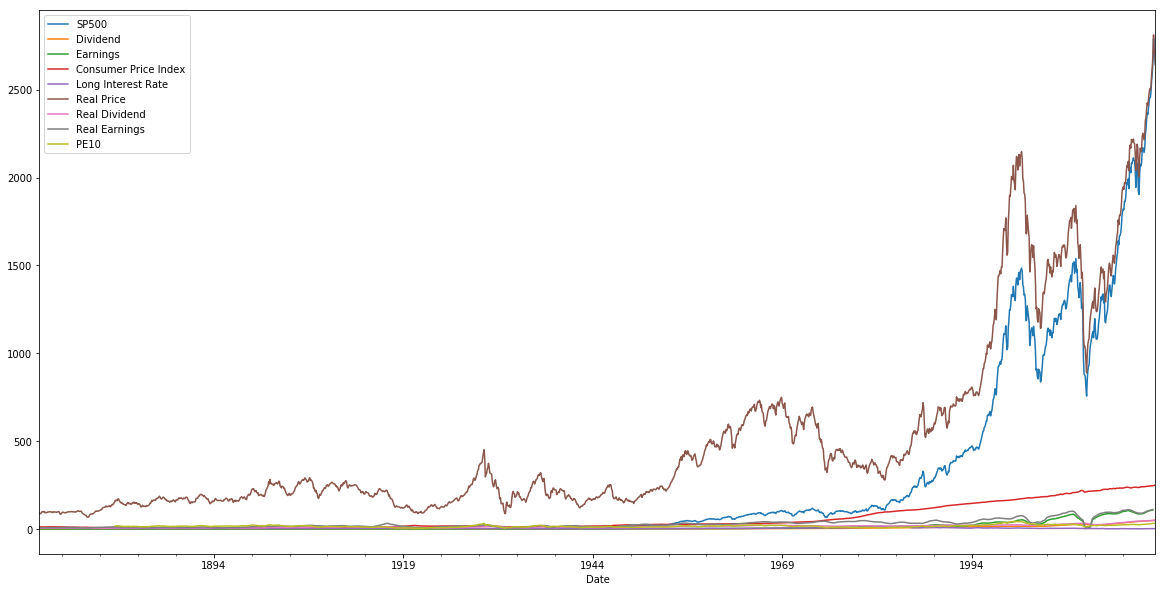

In [7]:
data.plot(figsize=(20,10), x=data.Date)
plt.show()

In [8]:
uptodate = data[data['Date'] > '1950-1-1']
# uptodate = data
uptodate = uptodate.iloc[:, 0:2]
uptodate = uptodate.rename(columns={'Date':'ds', "SP500":"y" })
uptodate.tail()

,ds,y
1763,2017-12-01,2664.34
1764,2018-01-01,2789.80
1765,2018-02-01,2705.16
1766,2018-03-01,2702.77
1767,2018-04-01,2642.19


In [9]:
uptodate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 949 to 1767
Data columns (total 2 columns):
ds    819 non-null datetime64[ns]
y     819 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


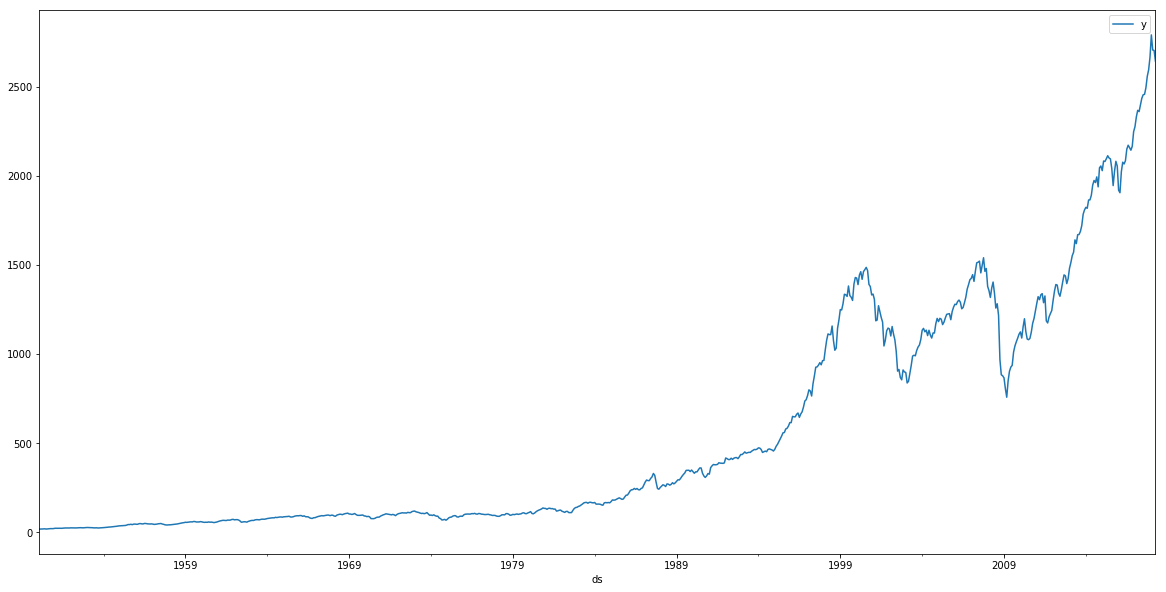

In [10]:
uptodate.plot(figsize=(20,10), x=uptodate.ds)
plt.show()

In [11]:
# Python
from fbprophet import Prophet

In [12]:
# Python
model = Prophet(growth='linear').fit(uptodate)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = model.make_future_dataframe(periods=60)
future.head()

,ds
0,1950-02-01
1,1950-03-01
2,1950-04-01
3,1950-05-01
4,1950-06-01


In [18]:
forecast = model.predict(future)
forecast[['ds', 'yhat']].tail()

,ds,yhat
874,2018-05-27,2181.282396
875,2018-05-28,2179.705346
876,2018-05-29,2177.592049
877,2018-05-30,2175.043325
878,2018-05-31,2172.180731


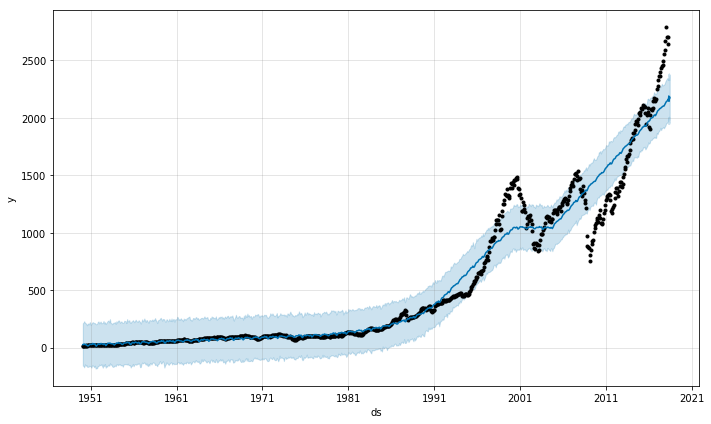

In [19]:
model.plot(forecast)
plt.show()

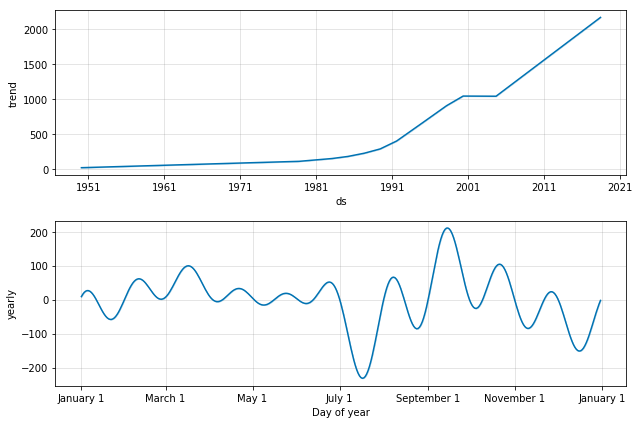

In [20]:
model.plot_components(forecast)
plt.show()